In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'y dataset')

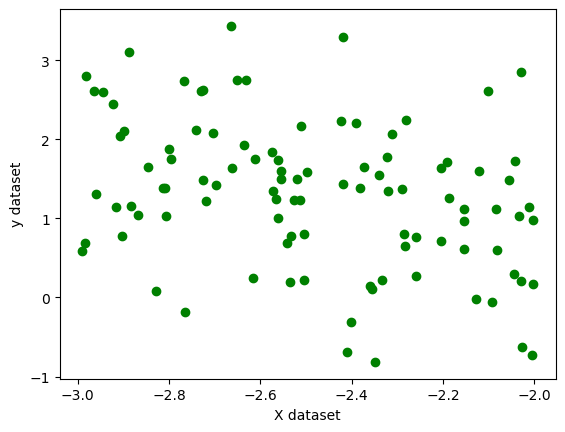

In [3]:
X = np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

# quadratic equation used - y = 0.5 * X**2 + 1.5*X + 2 + outliers
plt.scatter(X, y, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
## Simple Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()    

In [6]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lin_reg.predict(X_test))
print('R2 score for Linear Regression:', score)

R2 score for Linear Regression: 0.07374275950717102


Text(0, 0.5, 'y dataset')

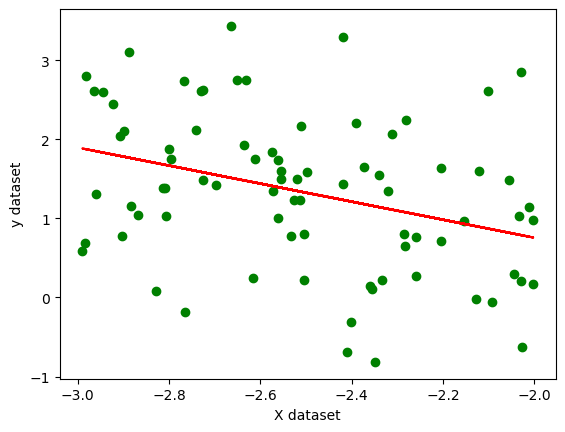

In [8]:
## Visualize this model
plt.plot(X_train, lin_reg.predict(X_train), color = 'r')
plt.scatter(X_train, y_train, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [9]:
## Applying Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [10]:
X_train_poly

array([[ 1.        , -2.00322341,  4.01290405],
       [ 1.        , -2.55357766,  6.52075887],
       [ 1.        , -2.02674527,  4.10769639],
       [ 1.        , -2.72497924,  7.42551184],
       [ 1.        , -2.33419393,  5.44846131],
       [ 1.        , -2.12654218,  4.52218163],
       [ 1.        , -2.80572689,  7.87210337],
       [ 1.        , -2.80049031,  7.842746  ],
       [ 1.        , -2.35573982,  5.5495101 ],
       [ 1.        , -2.4197359 ,  5.85512182],
       [ 1.        , -2.76407003,  7.64008312],
       [ 1.        , -2.72502713,  7.42577284],
       [ 1.        , -2.5727226 ,  6.61890156],
       [ 1.        , -2.02829264,  4.11397105],
       [ 1.        , -2.98492559,  8.90978076],
       [ 1.        , -2.52043968,  6.3526162 ],
       [ 1.        , -2.50352715,  6.2676482 ],
       [ 1.        , -2.81224424,  7.90871765],
       [ 1.        , -2.74134907,  7.51499475],
       [ 1.        , -2.7666171 ,  7.65417015],
       [ 1.        , -2.95883235,  8.754

In [11]:
from sklearn.metrics import r2_score
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)
y_pred = lin_reg2.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print('R2 score for Polynomial Regression:', score)

R2 score for Polynomial Regression: 0.07835997784868953


In [12]:
print('Coefficients:', lin_reg2.coef_)

Coefficients: [[ 0.         -1.76643781 -0.12546324]]


In [13]:
print('Intercept:', lin_reg2.intercept_)

Intercept: [-2.29383025]


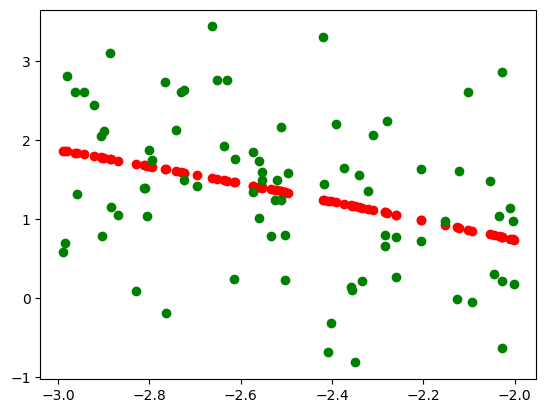

In [14]:
plt.scatter(X_train, lin_reg2.predict(X_train_poly), color = 'r')   
plt.scatter(X_train, y_train, color = 'g')

In [15]:

# Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)  
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

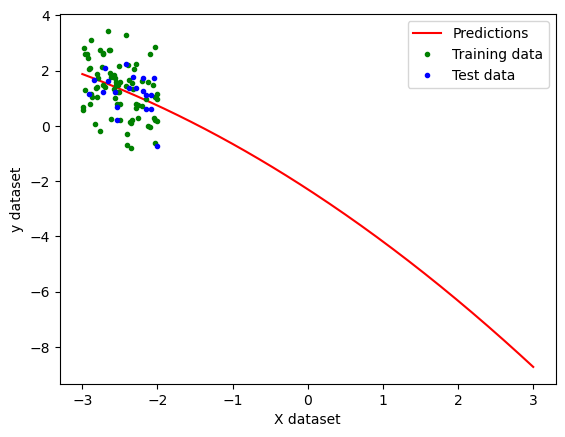

In [16]:
y_new = lin_reg2.predict(X_new_poly)
plt.plot(X_new, y_new, color = 'r', label = 'Predictions')
plt.plot(X_train, y_train, 'g.', label = 'Training data')
plt.plot(X_test, y_test, 'b.', label = 'Test data')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.legend()
plt.show()

Pipelining

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    poly_regression.fit(X_train, y_train)   
    y_pred_new = poly_regression.predict(X_new)  
    # Plotting prediction line
    plt.plot(X_new, y_pred_new, label = 'Predictions', color = 'r')
    plt.plot(X_train, y_train, 'g.', label = 'Training data')
    plt.plot(X_test, y_test, 'b.', label = 'Test data')
    plt.legend(loc = "upper left")
    plt.xlabel('X dataset')
    plt.ylabel('y dataset')
    plt.axis([-3, 3, 0, 10])
    plt.show()


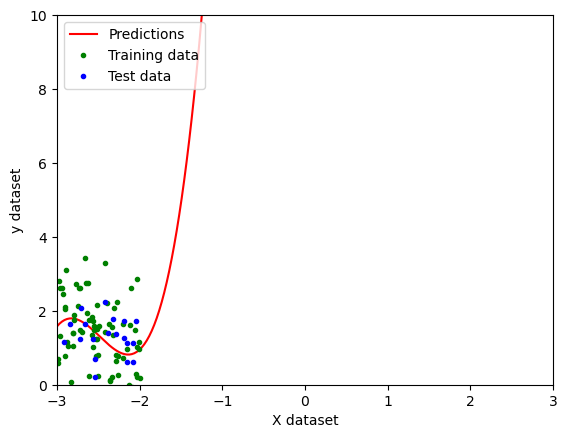

In [25]:
poly_regression(3)